<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Establish-the-API-parameters" data-toc-modified-id="Establish-the-API-parameters-2">Establish the API parameters</a></span></li><li><span><a href="#Retrieve-the-data" data-toc-modified-id="Retrieve-the-data-3">Retrieve the data</a></span></li><li><span><a href="#Visualise-the-case-data" data-toc-modified-id="Visualise-the-case-data-4">Visualise the case data</a></span></li></ul></div>

## Introduction

Playing around with the UK government COVID19 data API: "https://api.coronavirus.data.gov.uk/v1/data".

In [2]:
from requests import get
from json import dumps, loads

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## Establish the API parameters

In [3]:
API_URL = "https://api.coronavirus.data.gov.uk/v1/data"
AREA_TYPE = "overview"

endpoint = (
    API_URL + '?'
    'filters=areaType=overview' + '&'
    'structure={'
    '"date": "date", '
    '"new_cases": "newCasesByPublishDate", '
    '"hospital_cases":"hospitalCases", '
    '"cumulative_deaths_by_death_rate":"cumDeaths28DaysByDeathDateRate"'
    '}'
)

## Retrieve the data

In [4]:
conn = get(url=endpoint)
data = loads(conn.content)

In [5]:
type(data)

dict

In [6]:
print(f'Keys for the data returned are: \n {data.keys()}')


Keys for the data returned are: 
 dict_keys(['length', 'maxPageLimit', 'totalRecords', 'data', 'requestPayload', 'pagination'])


In [7]:
case_data = pd.DataFrame(data['data'])
case_data.sort_values('date', ascending=True, inplace=True)
case_data['date'] = pd.to_datetime(case_data['date'])

In [8]:
case_data.head()

,date,new_cases,hospital_cases,cumulative_deaths_by_death_rate
454,2020-01-31,2,NaN,NaN
453,2020-02-01,0,NaN,NaN
452,2020-02-02,0,NaN,NaN
451,2020-02-03,0,NaN,NaN
450,2020-02-04,0,NaN,NaN


## Visualise the case data

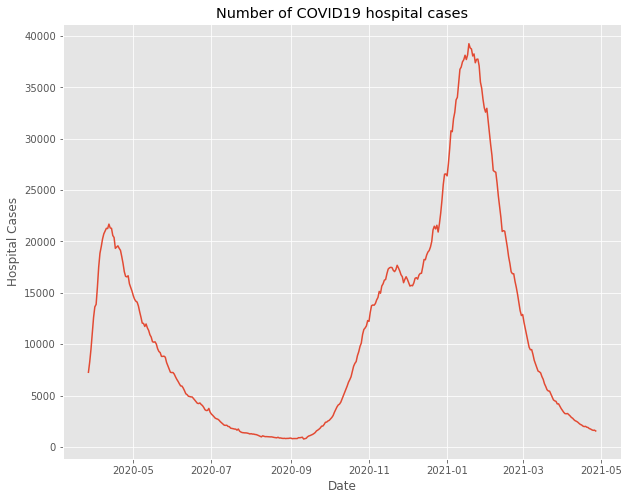

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 8))
axs = sns.lineplot(x=case_data['date'], 
                   y=case_data['hospital_cases'])
axs.set_title("Number of COVID19 hospital cases")
axs.set_xlabel("Date")
axs.set_ylabel("Hospital Cases"); # semi-colon removes the comments

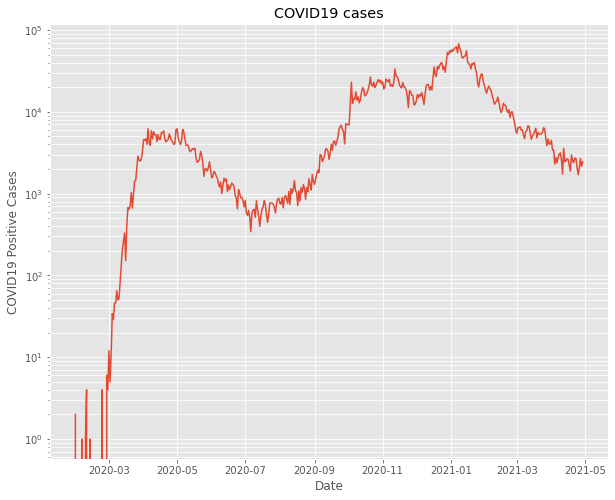

In [10]:
from matplotlib.ticker import ScalarFormatter
plt.figure(figsize=(10, 8))
axs_two = sns.lineplot(x=case_data['date'], 
                       y=case_data['new_cases'])
axs_two.set_title("COVID19 cases")
axs_two.set_xlabel("Date")
axs_two.set_ylabel("COVID19 Positive Cases"); # semi-colon removes the comments
axs_two.set_yscale('log')
plt.grid(True, which='both')